# Imports

In [1]:
import os

os.chdir("/home/roblesi/git/document_information_extraction/")
os.getcwd()

'/home/roblesi/git/document_information_extraction'

In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qbstyles import mpl_style

mpl_style(dark=False)
pd.set_option("display.max_rows", 500)

In [4]:
from src.data.wikipedia.wiki_data_base import retrieve_query

# Statics

In [5]:
from src.data.data_statics import SQL_WIKI_DUMP

# Retrieve data

In [6]:
query = """
    SELECT  pvw.*
    FROM wiki_page_view pvw
    INNER JOIN article_redirect_flag rd
        ON pvw.pageid=rd.pageid
    WHERE rd.redirect_flag = FALSE
"""

In [7]:
page_view_df = retrieve_query(query, out_f=SQL_WIKI_DUMP)
page_view_df = pd.DataFrame(
    page_view_df,
    columns=[
        "pageid",
        "title",
        "pageviews_2020_10_01",
        "pageviews_2020_11_01",
        "pageviews_2020_12_01",
        "pageviews_2021_01_01",
        "pageviews_2021_02_01",
        "pageviews_2021_03_01",
        "pageviews_2021_04_01",
        "pageviews_2021_05_01",
        "pageviews_2021_06_01",
        "pageviews_2021_07_01",
        "pageviews_2021_08_01",
        "pageviews_2021_09_01",
        "mean_views",
    ],
)

In [8]:
query = """
    SELECT  *
    FROM wiki_articles 
    WHERE pageid = 15910
"""

In [9]:
# retrieve_query(query, out_f=SQL_WIKI_DUMP)

In [10]:
page_view_df = page_view_df.sort_values(
    by="mean_views", ascending=False, ignore_index=True
)

In [11]:
page_view_df[["pageid", "title", "mean_views"]].head(50)

,pageid,title,mean_views
0,15580374,Main Page,4.189558e+08
1,4848272,Donald Trump,2.215255e+07
2,47817022,URL,1.873778e+07
3,50034356,Panama Papers,1.793394e+07
4,46230181,Saudi Arabian-led intervention in Yemen,1.789685e+07
5,15910,List of compositions by Johann Sebastian Bach,1.789558e+07
6,38892181,List of United States counties and county equi...,1.788739e+07
7,54266373,Special Counsel investigation (2017–2019),1.787259e+07
8,54115568,Timeline of Russian interference in the 2016 U...,1.787139e+07
9,52925867,2018 in American television,1.787089e+07


In [12]:
page_view_df.tail(10)

,pageid,title,pageviews_2020_10_01,pageviews_2020_11_01,pageviews_2020_12_01,pageviews_2021_01_01,pageviews_2021_02_01,pageviews_2021_03_01,pageviews_2021_04_01,pageviews_2021_05_01,pageviews_2021_06_01,pageviews_2021_07_01,pageviews_2021_08_01,pageviews_2021_09_01,mean_views
6081378,28779540,The Trouble With Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081379,27080285,Sample matrix inversion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081380,28779549,Joseph Gaudé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081381,9175375,Prandtl–Meyer function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081382,28779570,Gradistë belt-plate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081383,27080282,Pyrrocoma uniflora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081384,27080273,Boulevard Anspach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081385,24709684,Colloidal fuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081386,24709744,Engrossing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6081387,29281915,Roanoke Valley Rebels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Evaluate distribution

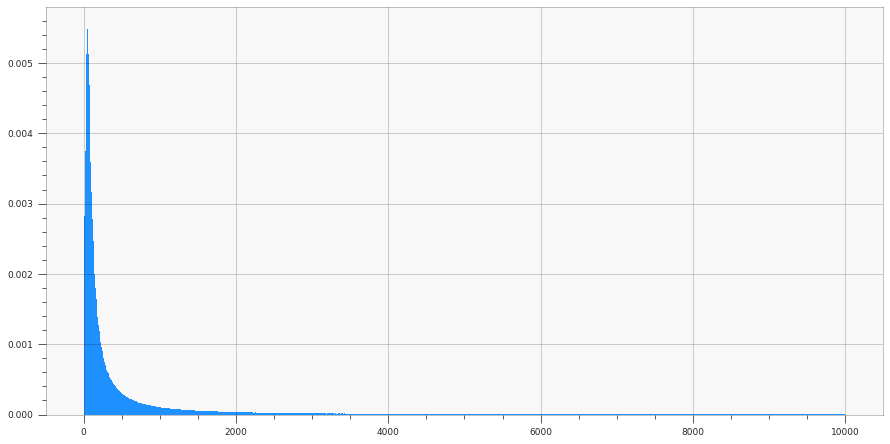

In [13]:
plt.figure(figsize=(15, 7.5))
page_view_df[(page_view_df["mean_views"] < 1e4) & (page_view_df["mean_views"] > 10)][
    "mean_views"
].hist(bins=1000, density=True, color="dodgerblue")
plt.show()

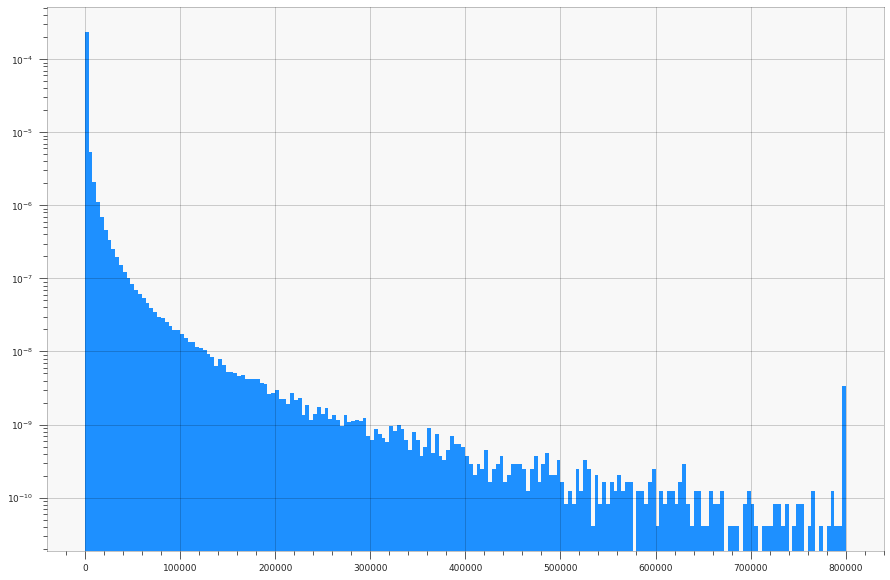

In [14]:
plt.figure(figsize=(15, 10))
# page_view_df[(page_view_df["mean_views"] < 1e7) & (page_view_df["mean_views"] >= 0)]
page_view_df["mean_views"].clip(None, 0.8e6).hist(
    bins=200, density=True, color="dodgerblue"
)

plt.yscale("log")
plt.show()

In [15]:
page_view_df["mean_views_cum"] = page_view_df["mean_views"].cumsum()
page_view_df["mean_views_cum_perc"] = (
    page_view_df["mean_views_cum"] / page_view_df["mean_views_cum"].max() * 100
)

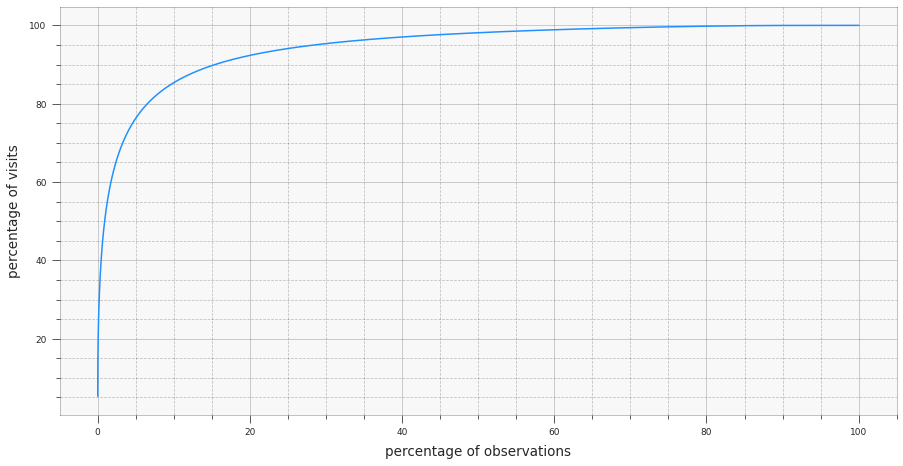

In [16]:
plt.figure(figsize=(15, 7.5))
plt.plot(
    np.linspace(0, 100, num=len(page_view_df)),
    page_view_df["mean_views_cum_perc"],
    color="dodgerblue",
)
plt.grid(b=True, which="major", axis="both", linestyle="-")
plt.grid(b=True, which="minor", axis="both", linestyle="--")
plt.ylabel("percentage of visits", fontsize=13.5)
plt.xlabel("percentage of observations", fontsize=13.5)
plt.show()

In [24]:
list(page_view_df[page_view_df["mean_views"] > 1e6]["pageid"].sample(10))

[145422,
 25817778,
 35708276,
 236034,
 21377251,
 2150841,
 12153654,
 46230181,
 15910,
 34228206]